In [30]:
#importing modules
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import pickle
from shutil import copy2
import tensorflow
import IPython

import keras
keras.backend.clear_session()

In [2]:
#reading data from csv file
df = pd.read_csv('all_data_info.csv')
artistcount = {}

for index, row in df.iterrows():
    if row["artist"] in artistcount:
        artistcount[row["artist"]] = artistcount[row["artist"]] + 1
    else:
        artistcount[row["artist"]] = 1



In [14]:
#dividing data into categories basis number of paintings and counting artists in each category
finalartists={'>=500':0, '500> && >=400':0, '400> && >=300':0,'300> && >=200':0,'200> && >=100':0,'<100':0}
for x in artistcount:
    if(artistcount[x] >=500):
        finalartists['>=500']+=1
    elif(artistcount[x]>=400):
        finalartists['500> && >=400']+=1
    elif(artistcount[x]>=300):
        finalartists['400> && >=300']+=1
    elif(artistcount[x]>=200):
        finalartists['300> && >=200']+=1
    elif(artistcount[x]>=100):
        finalartists['200> && >=100']+=1
    elif(artistcount[x]<100):
        finalartists['<100']+=1
                
for y in finalartists:
    print(y, ':', finalartists[y])

>=500 : 12
500> && >=400 : 25
400> && >=300 : 20
300> && >=200 : 53
200> && >=100 : 147
<100 : 2062


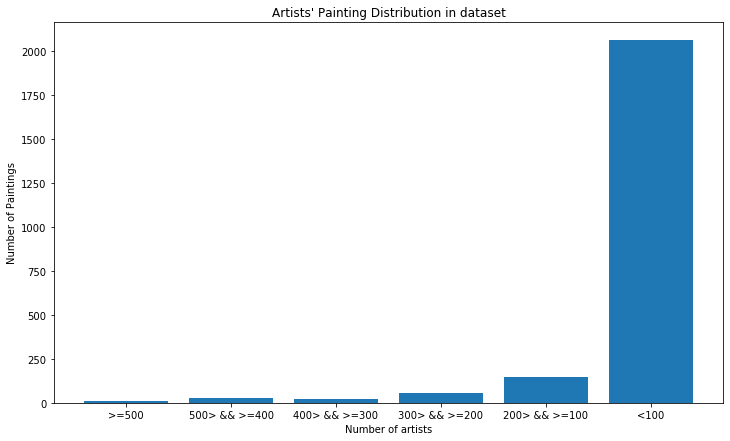

In [53]:
#plotting the artists' painting distribution
names = list(finalartists.keys())
values = list(finalartists.values())


plt.bar(range(len(finalartists)), values, tick_label=names)
plt.title("Artists' Painting Distribution in dataset")
plt.xlabel("Number of artists")
plt.ylabel("Number of Paintings")
plt.rcParams["figure.figsize"] = (12,7)
plt.show()

In [56]:
#finding total size of paintings in the dataset in bytes
totalsize=0
totalnumber=0

for index, row in df.iterrows():
    totalsize+=row["size_bytes"]
    totalnumber+=1

print(totalsize,totalnumber)

40094403725.0 103250


In [57]:
totalsize/(totalnumber*1e6)

0.38832352276029053

In [59]:
#finding count of artists in each genre
artistgenre={}
for index, row in df.iterrows():
    if row["genre"] in artistgenre:
        artistgenre[row["genre"]] = artistgenre[row["genre"]] + 1
    else:
        artistgenre[row["genre"]] = 1

In [60]:
len(artistgenre)

43

In [61]:
for y in artistgenre:
    print(y, ':', artistgenre[y])

abstract : 9498
nan : 1254
mythological painting : 1910
bird-and-flower painting : 119
cityscape : 5348
landscape : 15006
religious painting : 7429
marina : 1805
genre painting : 14260
history painting : 879
still life : 3132
animal painting : 1571
self-portrait : 1531
illustration : 3202
allegorical painting : 1034
literary painting : 558
flower painting : 1606
portrait : 16847
figurative : 2244
interior : 670
nude painting (nu) : 2290
poster : 286
symbolic painting : 2545
advertisement : 82
design : 2024
panorama : 19
sketch and study : 3644
cloudscape : 208
quadratura : 22
caricature : 231
capriccio : 236
veduta : 233
battle painting : 358
calligraphy : 160
vanitas : 32
pastorale : 125
wildlife painting : 327
miniature : 118
yakusha-e : 92
tessellation : 186
shan shui : 33
bijinga : 95
urushi-e : 1


In [63]:
workingdir='G:/btp data/Resized/top 400/finalartists/'

In [78]:

finalartistgenre={}
for index, row in df.iterrows():
    path=workingdir+row["new_filename"]
    if(os.path.exists(path)):
        if  row["genre"] in finalartistgenre:
                finalartistgenre[row["genre"]]+=1
        else:
                finalartistgenre[row["genre"]]= 1

marina
religious painting
religious painting
illustration
literary painting
marina
portrait
interior
landscape
sketch and study
religious painting
self-portrait
nan
illustration
illustration
landscape
portrait
religious painting
sketch and study
landscape
illustration
illustration
landscape
sketch and study
self-portrait
capriccio
cityscape
cityscape
interior
landscape
capriccio
landscape
landscape
genre painting
cityscape
cityscape
veduta
veduta
marina
cityscape
cityscape
illustration
interior
capriccio
illustration
interior
cityscape
cityscape
veduta
interior
cityscape
cityscape
cityscape
cityscape
cityscape
cityscape
design
cityscape
interior
capriccio
portrait
flower painting
veduta
sketch and study
interior
cityscape
veduta
capriccio
cityscape
cityscape
cityscape
cityscape
landscape
cityscape
cityscape
interior
capriccio
capriccio
veduta
capriccio
capriccio
interior
cityscape
cityscape
cityscape
landscape
capriccio
cityscape
self-portrait
illustration
cityscape
landscape
cityscape

In [80]:
num=0
for a in finalartistgenre:
    print(a, ':', finalartistgenre[a])
    num+=finalartistgenre[a]
print(num)

marina : 374
religious painting : 757
illustration : 568
literary painting : 54
portrait : 2025
interior : 108
landscape : 3825
sketch and study : 923
self-portrait : 201
nan : 31
capriccio : 27
cityscape : 1033
genre painting : 1962
veduta : 19
design : 454
flower painting : 340
symbolic painting : 634
poster : 22
animal painting : 131
still life : 508
mythological painting : 166
nude painting (nu) : 355
allegorical painting : 39
caricature : 49
miniature : 2
vanitas : 9
abstract : 54
history painting : 34
figurative : 29
cloudscape : 38
panorama : 2
battle painting : 14
advertisement : 12
pastorale : 1
14800


In [81]:
#finding number of artists in each style category
finalartiststyle={}
for index, row in df.iterrows():
    path=workingdir+row["new_filename"]
    if(os.path.exists(path)):
        if  row["style"] in finalartiststyle:
                finalartiststyle[row["style"]]+=1
        else:
                finalartiststyle[row["style"]]= 1

In [82]:
num=0
for a in finalartiststyle:
    print(a, ':', finalartiststyle[a])
    num+=finalartiststyle[a]
print(num)

Romanticism : 908
Symbolism : 811
Baroque : 399
Impressionism : 3289
Northern Renaissance : 399
nan : 75
Realism : 2939
Art Nouveau (Modern) : 928
Neoclassicism : 445
Post-Impressionism : 1078
Japonism : 25
Cubism : 314
Surrealism : 966
Cloisonnism : 73
Orientalism : 12
Tubism : 20
Purism : 96
Naïve Art (Primitivism) : 330
Abstract Expressionism : 29
Constructivism : 8
Expressionism : 757
Fauvism : 72
Pointillism : 69
Divisionism : 245
Color Field Painting : 1
Magic Realism : 400
Orphism : 19
Abstract Art : 1
Socialist Realism : 9
Synthetic Cubism : 15
Analytical Cubism : 15
Synthetism : 3
Art Deco : 44
Suprematism : 4
Op Art : 1
Byzantine : 1
14800


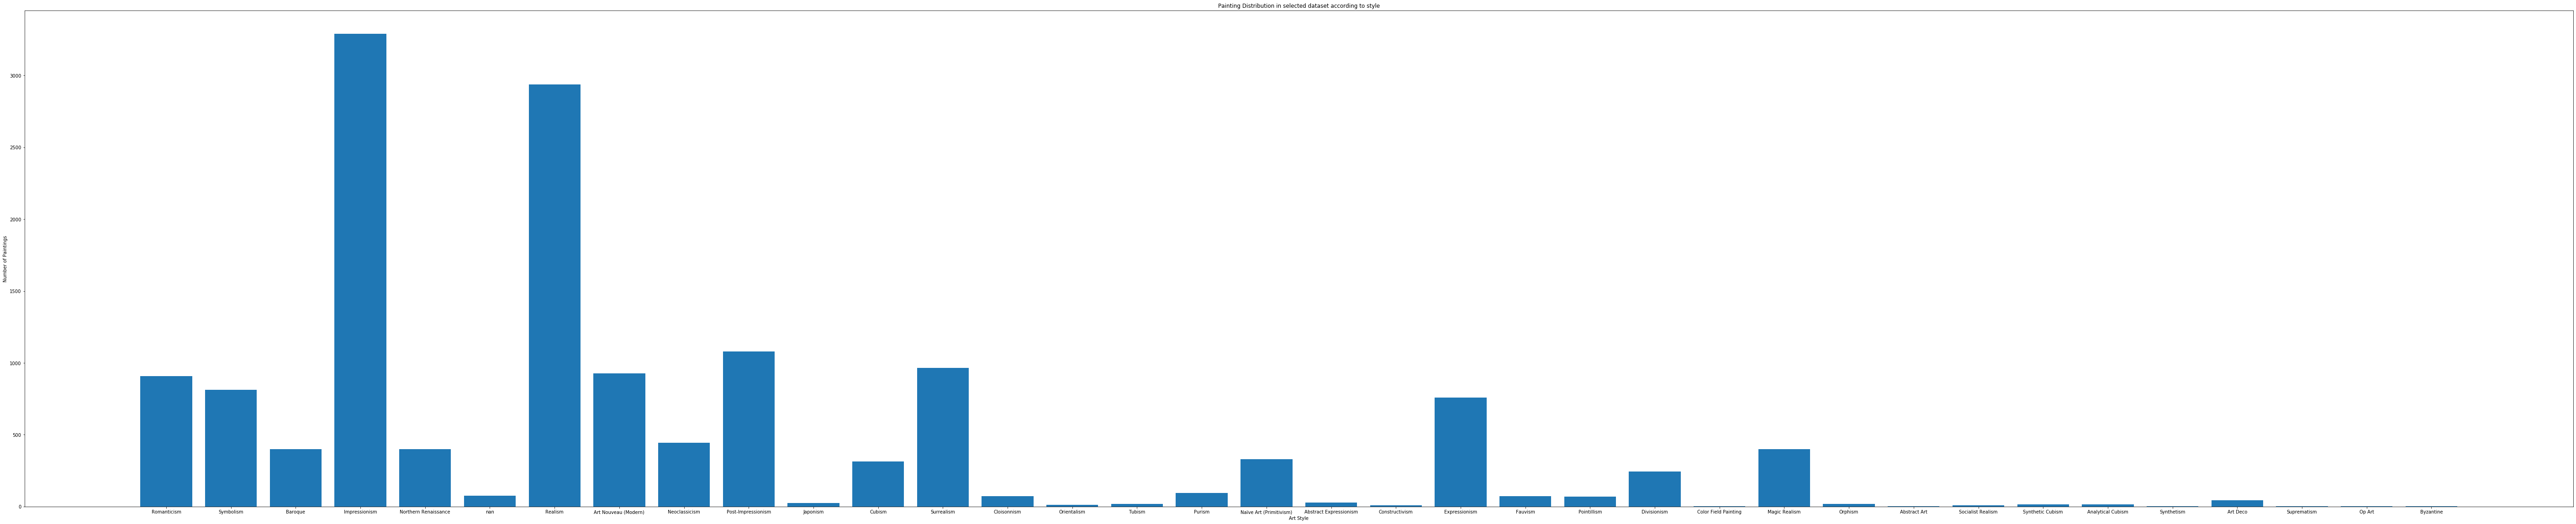

In [94]:
#bar chart of style distribution
names = list(finalartiststyle.keys())
values = list(finalartiststyle.values())


plt.bar(range(len(finalartiststyle)), values, tick_label=names)
plt.title("Painting Distribution in selected dataset according to style")
plt.xlabel("Art Style")
plt.ylabel("Number of Paintings")
plt.rcParams["figure.figsize"] = (100,20)
plt.show()

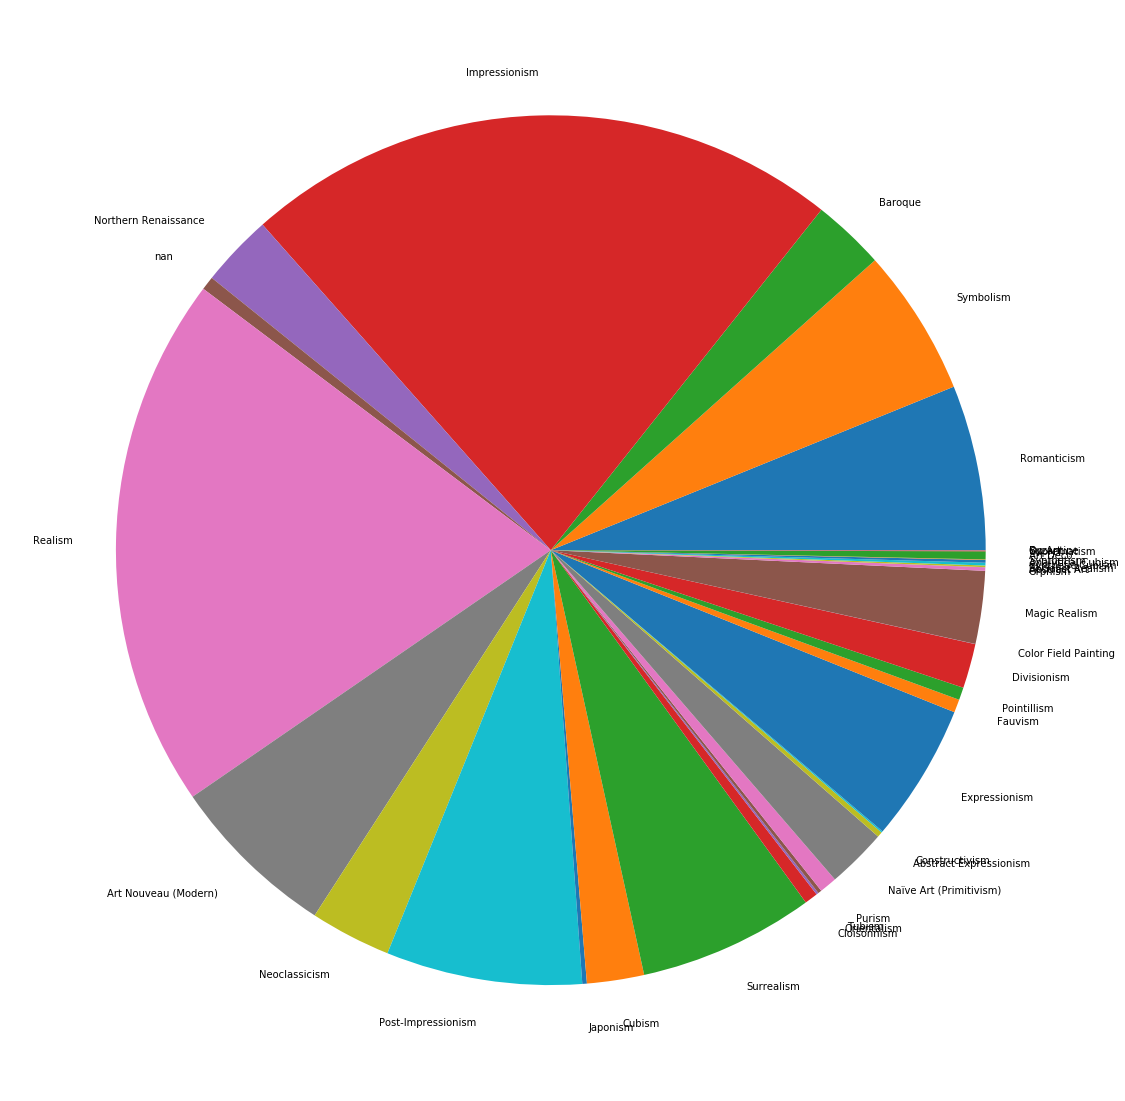

In [95]:
#pie chart of style distribution
plt.pie(values, labels=names)
plt.rcParams["figure.figsize"] = (100,20)
plt.show()

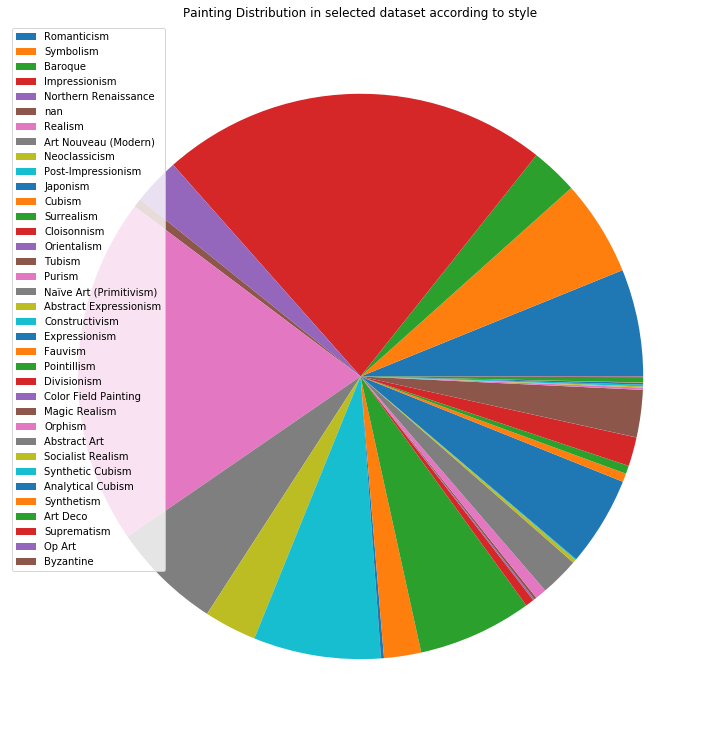

In [125]:
#pie chart of style distribution
plt.rcParams["figure.figsize"] = (27,13)
plt.title("Painting Distribution in selected dataset according to style")
patches, texts = plt.pie(values)
plt.legend(patches, names, loc="best")

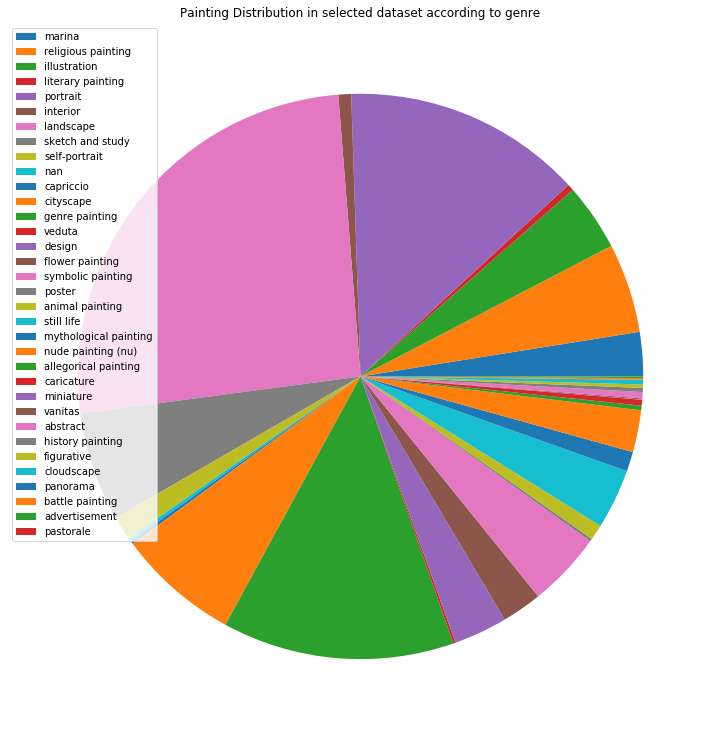

In [126]:
#pie chart of style distribution
names = list(finalartistgenre.keys())
values = list(finalartistgenre.values())

plt.rcParams["figure.figsize"] = (27,13)
plt.title("Painting Distribution in selected dataset according to genre")
patches, texts = plt.pie(values)
plt.legend(patches, names, loc="best")